# Fun with numpy.random
Exploring numpy.random library as assignment for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 11-10-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/fun-with-numpy-random/>.

___

## Random Sampling

### Setting up the scene

Importing numpy.random library and version check.

In [38]:
import numpy as np # NumPy package
import matplotlib.pyplot as plt # plotting engine
# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

In [39]:
np.version.version

'1.17.2'

A built-in help is available, accessible through the following commands:  
`dir()` prints out available functionalities of the parsed method  
`help()` shows doc-string of the parsed method

In [40]:
# dir(np.random) # commented out for clarity

In [41]:
# help(np.random.randint) # commented out for clarity

A quick test of the numpy.random routine.

In [42]:
np.random.random() # get a random float number from *uniform distributtion* on [0,1)

0.36070434750348823

___

### Simple random data

Note 1: In this Notebook terms _funtion_, _method_, _routine_ and _subroutine_ are used interchangeably.  
Note 2: `np.random` generates pseudo-random numbers, but for simplicity in this Notebook _random_ is used interchangeably.

NumPy comes with a large numbers of built-in functionalities, in the library documentation referred as to routines. Random sampling (`numpy.random`) is an example of such a routine (function). 

**Simple random data** is a collection of methods used for two applications:  
1) generating of a pseudo random number from a range,  
2) random selection of an object from a list.

In the first category, there are several methods, producing different outputs. For instance, the `np.random.random()` generates float numbers from half-open range [0,1), whereas `np.random.randint()` generates integer numbers from a range.

The second category, offers the functionality of random picking of objects from an existing list. 

Below we will see example use of a few methods from the Simple random data.

`np.random.random`  
This method returns random float number(s) from _uniform distribution_ on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)

In [43]:
# get a random float number from *uniform distributtion* on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)
np.random.random()

0.5590830005731053

In [44]:
# get 5 random numbers from [0,1) and print out avarage of them
sum = 0
for i in range(5):
    x = np.random.random()
    sum = sum + x
    print(i+1,": ",x)
print("Mean:",sum/5)

1 :  0.18399935848165738
2 :  0.14166938271176388
3 :  0.9969581483005224
4 :  0.378455402776642
5 :  0.3316295781223789
Mean: 0.40654237407859295


In [45]:
# get a n-dimensional array (ndarray) of random numbers on [0,1); when no value is parsed, it returns a simple float number
np.random.random((2,3)) # double brackets, because this method takes a single value only - in this case a tuple

array([[0.87934043, 0.42729534, 0.49647961],
       [0.89037173, 0.03852302, 0.24248352]])

`np.random.randn`  
This method generates a n-dimensional array of numbers from the _standard normal distribution_.

In [46]:
np.random.randn(2, 4)

array([[ 0.21494897, -2.00724012, -0.23450808, -1.68132254],
       [-0.87896538, -0.29813256, -0.50240545, -1.38582407]])

It may be convenient to compare the `random` and `randn` subroutines to each other with results visualised on a plots.  
Plotting random distribution vs normal distribution.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


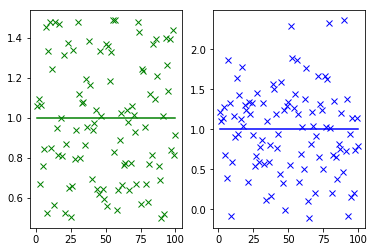

In [47]:
x = np.arange(0.0, 101, 1) # set range of x values for plotting
y1 = x/x # constant horizontal line against x - will be used as a baseline for showing random noise
y2 = x/x # - will be used as a baseline for showing normal noise
noise_random = np.random.random(size=(len(x)))-0.5 # random noise in on (0,1] and offset by0.5 in order to centralise about the base line
noise_normal = np.random.normal(0.0, 0.5, len(x)) # normal distribution of noise

plt.subplot(1, 2, 1)
plt.plot(x, y1, 'g-') # baseline for random distribution noise
plt.plot(x, y1 + noise_random, 'gx') # green x-es denote random noise value for each sample

plt.subplot(1, 2, 2)
plt.plot(x, y2, 'b-') # baseline for normal distribution noise
plt.plot(x, y2 + noise_normal, 'bx') # blue x-es denote normal noise value for each sample

**np.random.randint**  
This method generates integer number(s) in a given range.

In [48]:
np.random.randint(1,11, size=3) # 3 random integers in range (1,10) - inclusive

array([8, 3, 4])

In the second category of subroutines of simple random data, from a pre-defined pool of objects.

**np.random.choice**  
This method returns items (not necessarily numbers) from an existing list.

In [49]:
list_1 = [1,2,3,4] # predefinition of list of numbers
list_2 = ["dog", "cat", "snake", "rat"] # predefinition of list of animals

np.random.choice(list_2, size=7)

array(['snake', 'cat', 'rat', 'dog', 'snake', 'dog', 'rat'], dtype='<U5')

It is also possible to assign a probability for each option:

In [50]:
np.random.choice(list_1, p=[0.1, 0.1, 0.1, 0.7], size=10)

array([3, 4, 4, 4, 4, 4, 4, 4, 3, 4])

**np.random.bytes**  
Returns random bytes in hexadecimal format. For example:

In [51]:
np.random.bytes(1)

b'\xe0'

### Permutations

This group of methods in NumPy and allow to randomly reorder the objects in the set or in sub-set (range). It consists of two subroutines: `shuffle` and `permutation`.

#### **random.shuffle**  
`np.random.shuffle` method randomly reorders the items of the entire set _in place_, that is original order is overwritten with the new sequence.

In [52]:
print(list_1) # in original order
np.random.shuffle(list_1)
list_1 # in new order, overwriting the original

[1, 2, 3, 4]


[1, 3, 4, 2]

#### **random.permutation**
`np.random.permutation` method returns a new array (copy of the original) of the objects from a list, randomly ordered.

In [53]:
# we are using lists from previous examples, defined in cells above
np.random.permutation(list_1)

array([4, 1, 3, 2])

It is worth noting that `np.random.permutation` is built up on `np.random.shuffle` subroutine, which is used in the former source code. Extra functionality is provided on condition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary `shuffle` function.

___

### Distributions

NumPy comes with a selection of built-in random distributions, which are used to sample random data in a specific pattern from statistical science.
In NumPy v1.17.2, there are thirty-five different distributions available. Below we will discuss five of them, namely: uniform, standard_normal, binomial, exponential, weibull.

#### **1. Uniform distribution**

`numpy.random.uniform` function generates random floating point number(s). Each random value returned from this method is equally probable to occur. The generated numbers are from half-open range - ends defined when the function is called. If the range is not defined, by default it is assumed to be [0,1), in which case the subroutine behaves the same as np.random.random one.

In [54]:
np.random.uniform(size=3)

array([0.97103386, 0.76937102, 0.15981034])

In [55]:
np.mean(np.random.uniform(0.9,1, size=10) * 10)

9.578196500850215

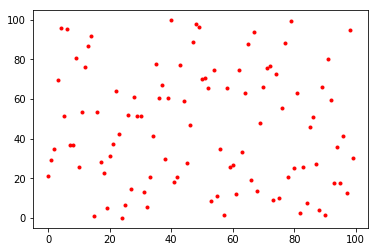

In [56]:
plt.plot(np.random.uniform(0,100, size=100), 'r.')

The uniform distribution shows a property to fill out histograms bins uniformly, which becomes clearer for increasing number of samples.

<function matplotlib.pyplot.show(*args, **kw)>

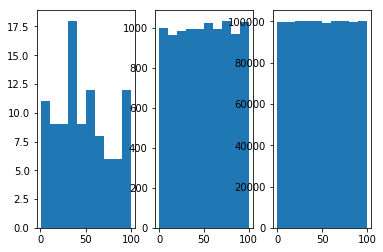

In [57]:
plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0,100, size=10**2)) # 100 samples

plt.subplot(1, 3, 2)
plt.hist(np.random.uniform(0,100, size=10**4)) # 10000 samples

plt.subplot(1, 3, 3)
plt.hist(np.random.uniform(0,100, size=10**6)) # 1000000 samples
plt.show # this command will hide away numeral values of the output - for clarity

#### **2. Standard normal distribution**  

`numpy.random.standard_normal` draws a standard normal (Gaussian) distribution for mean=0 and deviation=1 (another NumPy distribution, `np.random.normal`, allows to change these parameters). The more samples, the more "ideal" shape of the distribution.

Actual minimum:  -2.9238291625731136
Actual maximum:  2.69829144494433
Actual mean:  0.01577964965563291
Actual standard diviation:  1.0160654141540115


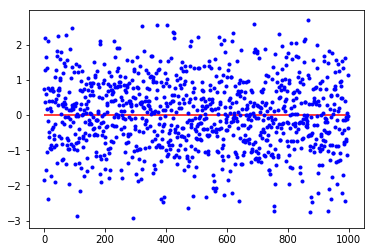

In [58]:
a = np.random.standard_normal(size=1000) # standard normal distribution generation for n=1000 samples

plt.hlines(0,0,1000, colors='r') # baseline 
plt.plot(a, 'b.')

# for reference, actual distribution parameters from the generated set
print("Actual minimum: ", np.min(a))
print("Actual maximum: ", np.max(a))
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))

(array([  6.,   8.,  12.,  13.,  26.,  37.,  69.,  81.,  86., 109., 114.,
        112.,  79.,  88.,  50.,  44.,  30.,  19.,  11.,   6.]),
 array([-2.92382916, -2.64272313, -2.3616171 , -2.08051107, -1.79940504,
        -1.51829901, -1.23719298, -0.95608695, -0.67498092, -0.39387489,
        -0.11276886,  0.16833717,  0.4494432 ,  0.73054923,  1.01165526,
         1.29276129,  1.57386732,  1.85497335,  2.13607938,  2.41718541,
         2.69829144]),
 <a list of 20 Patch objects>)

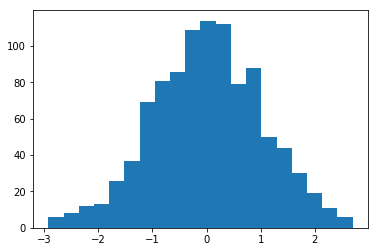

In [59]:
plt.hist(a, bins=20)

#### **3. Binomial distribution**

`np.random.binomial` samples from binomial distribution, where the results are two-folds, often represented as a _success_ or a _failure_. This distribution gives number of successful trials of `n`-total number of trials. Each result has a predefined `p`-probability of success.
For a large number of repetition (represented in NumPy by parameter _size_), and equal probability of winning (p=0.5), the result resembles a normal distribution.

In [60]:
np.random.binomial(1,0.5, size=10) # for 10 attempts, what is the result of the test, 1 - success, 0 - failure

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

Actual mean:  4.9972
Actual standard diviation:  1.5794911079205227


<function matplotlib.pyplot.show(*args, **kw)>

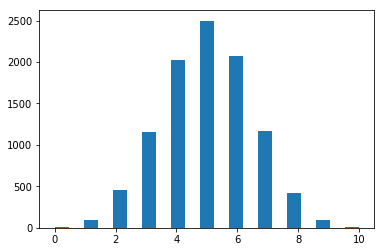

In [61]:
a = np.random.binomial(10,0.5, size=10000) # how many success will be in n=10 trials of tossing a 'fair' coin (p=0.5), test repetead 10000 times
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))
plt.hist(a, bins=21) # density of successes in 10-trials binomial tests repeated 10000 times
plt.show # this command will hide away numeral values of the output - for clarity

#### **4. Exponential distribution**  

`numpy.random.exponential` function draws results from exponential distribution. This type of distribution is typically used to calculate the probability of an event occurring in a time interval. It takes two parameters, the first one being the _scale_, which relates to the time period, and the other one - _size_, which is a number of experiments (by default size=10). For example, if independent events are to occur per unit of time (which is a function of parameter _scale_), the exponential distribution describes the time intervals between successive events.  
Exponential distribution is a special case of gamma distribution, and is related to Poisson distribution.  
Below is an example of the distribution and the graphical interpretation.

<function matplotlib.pyplot.show(*args, **kw)>

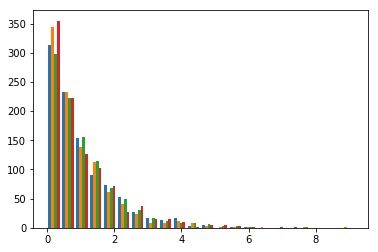

In [62]:
a = np.random.exponential(1, [1000,4]) # the first parameter (scale) relates to time period, the second one (size) - to number of experiments (4 sets of 1000 experiments)
plt.hist(a, bins=22) # the values in bins are grouped by sets of experiment, each in represented by different colour
plt.show # this command will hide away numeral values of the output - for clarity

#### **5. Weibull distribution**

`numpy.random.weibull` subroutine produces results from weilbull distribution. This probability distribution is often used in equipment reliability, e.g. to evaluate mean time between failures (MTBF) - reliability related concepts were discussed in the paper I published [here](http://system.logistics-and-transport.eu/index.php/main/article/view/509). The function takes two parameters: shape and size. The shape must be greater than one and relates to the slope of the regressed line in probability plot' (Realiawiki). For shape > 1 the probability density distribution resembles normal distribution, but skewed; for shape < 1 it resembles exponential distribution.

<function matplotlib.pyplot.show(*args, **kw)>

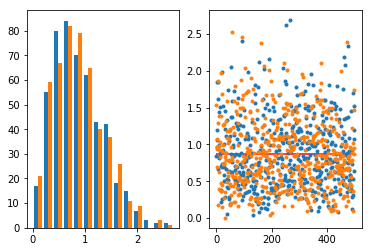

In [63]:
a = np.random.weibull(2, [500,2]) # the first parameter (shape), the second one (size) - to number of experiments (2 sets of 500 experiments)
plt.subplot(1, 2, 1)
plt.hist(a, bins=14) # results of the two sets of experiments are represented by differnt colours

plt.subplot(1, 2, 2)
plt.plot(a, '.')
plt.hlines((np.mean(a)),0,500, colors='r') # draws a horizontal line at mean-value for comparison purpose

plt.show # this command will hide away numeral values of the output - for clarity

### Seed

Randomness is an interesting question in computer science and, apparently, posses some technical challenges (source: [Quora](https://www.quora.com/Why-is-it-so-hard-to-generate-actually-random-numbers), [Wikipedia](https://www.quora.com/Why-is-it-so-hard-to-generate-actually-random-numbers)).  

For typical applications (not suitable for security and cryptography) the uncertainty is simulated by application of algorithms. The generated results are not truly random, and so are distinctly called pseudo-random. The technique of acquiring the numbers is referred as to _Pseudo Random Number Generator_ (PRNG).  

Python (and NumPy) also uses PRNG to simulate uncertainty. Python uses the Mersenne Twister algorithm. Below is a short exert from OverStack on the algorithm (source: [StackOverflow](https://stackoverflow.com/a/7030595)). 

>  [Python and NumPy] both use the Mersenne twister sequence to generate their random numbers, and they're both completely deterministic - that is, if you know a few key bits of information, it's possible to predict with absolute certainty what number will come next. For this reason, neither numpy.random nor random.random is suitable for any serious cryptographic uses. But because the sequence is so very very long, both are fine for generating random numbers in cases where you aren't worried about people trying to reverse-engineer your data. This is also the reason for the necessity to seed the random value - if you start in the same place each time, you'll always get the same sequence of random numbers!

The above quote reveals the importance of careful defining of an initial conditions, represented by the **_seed_**. If the initial conditions are the same, the result will also be the same. 

Unless, implicitly specified, the seed is taken from the system clock. The system clock in Unix-based systems is stored in the form of seconds passed from 1st January 1970. As the passing time is monitored with a high precision (CPU dependent), every time the pseudo-random number that is generated may appear different and random.  

The current time in seconds passed from 1st January 1970 can be obtained with `time()` method from _time_ library.

In [80]:
import time;
time.time()

1572267870.544171

In [82]:
np.random.random()

0.04666973695560006

In [83]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.

